In [1]:
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

In [2]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast
import math
import seaborn as sns; 

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, roc_auc_score, roc_curve, f1_score, classification_report

In [3]:
df_weapon = pd.read_csv(r"C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/logfile 1.csv", delimiter=',')
df_weapon.head(10)

,Timestamp,Level,LoggerName,Message,Data
0,12-11-2023 15:42,266,WARNING,app,1 | 0 | 0 | No Coordinate data
1,12-11-2023 15:42,268,WARNING,app,1 | 0 | 0 | No Coordinate data
2,12-11-2023 15:42,461,WARNING,app,1 | 0 | 0 | No Coordinate data
3,12-11-2023 15:42,3,WARNING,app,1 | 0 | 0 | No Coordinate data
4,12-11-2023 15:43,58,WARNING,app,1 | 0 | 0 | No Coordinate data
5,12-11-2023 15:43,91,WARNING,app,1 | 0 | 0 | No Coordinate data
6,12-11-2023 15:43,123,WARNING,app,1 | 0 | 0 | No Coordinate data
7,12-11-2023 15:43,52,WARNING,app,0 | 3 | 2 | Please wait sometime before reloa...
8,12-11-2023 15:43,22,WARNING,app,0 | 3 | 2 | Please wait sometime before reloa...
9,12-11-2023 15:43,156,WARNING,app,1 | 0 | 0 | No Coordinate data


In [4]:
df_weapon.columns

Index(['Timestamp', 'Level', 'LoggerName', 'Message', 'Data'], dtype='object')

In [5]:
df_weapon[['Weapon Range Status', 'Weapons Status', 'Status', 'Msg']] = df_weapon['Data'].str.split('|', expand=True)

In [6]:
df_weapon.head()

,Timestamp,Level,LoggerName,Message,Data,Weapon Range Status,Weapons Status,Status,Msg
0,12-11-2023 15:42,266,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
1,12-11-2023 15:42,268,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
2,12-11-2023 15:42,461,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
3,12-11-2023 15:42,3,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data
4,12-11-2023 15:43,58,WARNING,app,1 | 0 | 0 | No Coordinate data,1,0,0,No Coordinate data


In [7]:
columns_to_select_weapon = ['Level', 'Weapon Range Status', 'Weapons Status', 'Status']
df_weapon_new = df_weapon[columns_to_select_weapon].copy()

In [8]:
df_weapon_new.head(10)

,Level,Weapon Range Status,Weapons Status,Status
0,266,1,0,0
1,268,1,0,0
2,461,1,0,0
3,3,1,0,0
4,58,1,0,0
5,91,1,0,0
6,123,1,0,0
7,52,0,3,2
8,22,0,3,2
9,156,1,0,0


In [9]:
df_weapon_new = df_weapon_new[df_weapon_new['Level'] != 'Level']

In [10]:
df_weapon_new[df_weapon_new.isna().any(axis=1)].isna().sum(axis=1)

Series([], dtype: int64)

In [11]:
df_scada_good = pd.read_csv(r"C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/ship_power_randomized_data_constant_speed.csv", delimiter=',')
df_scada_good.head()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts)
0,15,1024.681725,0.035009,1004.940348,6.083512e+07
1,15,1025.047390,0.034992,1004.648764,6.080872e+07
2,15,1025.085363,0.034986,1004.614887,6.079992e+07
3,15,1024.775867,0.035013,1005.331773,6.087118e+07
4,15,1024.675182,0.034996,1005.270724,6.083186e+07


In [12]:
df_scada_good['Stat'] = 0

In [13]:
df_scada_good.columns

Index(['Speed (m/s)', 'Density of Seawater (kg/m^3)', 'Drag Coefficient',
       'Wetted Surface Area (m^2)', 'Power Required (Watts)', 'Stat'],
      dtype='object')

In [14]:
df_scada_bad = pd.read_csv(r"C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/ship_power_randomized_data_variable_speed_40.csv", delimiter=',')
df_scada_bad.head()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts)
0,9.137496,1025.001992,0.035012,1005.164477,1.376045e+07
1,14.873070,1024.962505,0.035011,1004.890365,5.931992e+07
2,17.134647,1024.612871,0.035009,1005.345407,9.070977e+07
3,12.223697,1024.659058,0.035007,1005.053599,3.292352e+07
4,11.690948,1025.297478,0.035008,1005.463028,2.883380e+07


In [15]:
df_scada_bad['Stat'] = 1

In [16]:
df_scada_bad.columns

Index(['Speed (m/s)', 'Density of Seawater (kg/m^3)', 'Drag Coefficient',
       'Wetted Surface Area (m^2)', 'Power Required (Watts)', 'Stat'],
      dtype='object')

In [17]:
df_scada_combined = pd.concat([df_scada_good, df_scada_bad], ignore_index=True)

In [18]:
df_scada_combined.head()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts),Stat
0,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0
1,15.0,1025.047390,0.034992,1004.648764,6.080872e+07,0
2,15.0,1025.085363,0.034986,1004.614887,6.079992e+07,0
3,15.0,1024.775867,0.035013,1005.331773,6.087118e+07,0
4,15.0,1024.675182,0.034996,1005.270724,6.083186e+07,0


In [19]:
df_scada_combined.tail()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts),Stat
1995,9.283362,1024.978820,0.035000,1005.438117,1.442877e+07,1
1996,20.801966,1025.129375,0.034998,1004.864824,1.622622e+08,1
1997,20.195419,1024.918779,0.035004,1005.167364,1.485152e+08,1
1998,20.559452,1024.670379,0.034984,1005.359189,1.565964e+08,1
1999,10.199823,1025.027584,0.034992,1004.653371,1.911938e+07,1


In [20]:
df_new = pd.merge(df_scada_combined.assign(key=1), df_weapon_new.assign(key=1), on='key').drop('key', axis=1)

In [21]:
df_new.head()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts),Stat,Level,Weapon Range Status,Weapons Status,Status
0,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,266,1,0,0
1,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,268,1,0,0
2,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,461,1,0,0
3,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,3,1,0,0
4,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,58,1,0,0


In [22]:
df_new.shape

(25226000, 10)

In [23]:
# df_new.to_csv('C:/Users/chinm/Documents/Assignments/CIP BATTLESHIP/df_new.csv', index=False)

In [24]:
# df_new[df_new.isna().any(axis=1)].isna().sum(axis=1)

In [25]:
# df_new.iloc[987]

In [26]:
# df_new = df_new[df_new['Level'] != 'Level']

In [27]:
df_new[df_new.isna().any(axis=1)].isna().sum(axis=1)

Series([], dtype: int64)

In [28]:
df_new['Status'] = df_new['Status'].astype(int)
df_new['Status'].dtype

dtype('int32')

In [29]:
df_new['Stat'].dtype

dtype('int64')

In [30]:
# df_new['Label'] = df_new['Status'].apply(lambda x: 1 if x in [2] else 0)
df_new['Label'] = df_new.apply(lambda row: 1 if row['Status'] == 2 or row['Stat'] == 1 else 0, axis=1)
# df_new['Label'] = 1
# df_new.loc[(df_new['Status'] == 0) | (df_new['Status'] == 1), 'Label'] = 0

In [31]:
df_new.head()

,Speed (m/s),Density of Seawater (kg/m^3),Drag Coefficient,Wetted Surface Area (m^2),Power Required (Watts),Stat,Level,Weapon Range Status,Weapons Status,Status,Label
0,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,266,1,0,0,0
1,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,268,1,0,0,0
2,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,461,1,0,0,0
3,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,3,1,0,0,0
4,15.0,1024.681725,0.035009,1004.940348,6.083512e+07,0,58,1,0,0,0


In [32]:
# df_new.tail()
(df_new['Label'] == 1).sum()

19806000

In [33]:
y = df_new['Label']

In [34]:
df_new = df_new.drop(columns=['Label'])

In [35]:
df_new.columns

Index(['Speed (m/s)', 'Density of Seawater (kg/m^3)', 'Drag Coefficient',
       'Wetted Surface Area (m^2)', 'Power Required (Watts)', 'Stat', 'Level',
       'Weapon Range Status', 'Weapons Status', 'Status'],
      dtype='object')

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import roc_auc_score
# Assuming you have a target variable 'y' for regression

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In [37]:
comparison_df = pd.DataFrame({'Actual (y_test)': y_test, 'Predicted (y_pred)': y_pred})

In [38]:
comparison_df.head(20)

,Actual (y_test),Predicted (y_pred)
25006547,1,1.0
4572869,0,0.0
10282946,1,1.0
7711772,0,0.0
18709253,1,1.0
13026309,1,1.0
17551693,1,1.0
5252228,0,0.0
20712906,1,1.0
2244945,1,1.0


In [39]:
comparison_df.columns

Index(['Actual (y_test)', 'Predicted (y_pred)'], dtype='object')

In [40]:
roc_auc_score(comparison_df['Actual (y_test)'], comparison_df['Predicted (y_pred)'])

1.0

In [41]:
from sklearn.tree import export_text
from sklearn import tree

In [42]:
tree_rules = export_text(regressor, feature_names=list(X_train.columns))
print(tree_rules)

|--- Status <= 1.50
|   |--- Stat <= 0.50
|   |   |--- value: [0.00]
|   |--- Stat >  0.50
|   |   |--- value: [1.00]
|--- Status >  1.50
|   |--- value: [1.00]



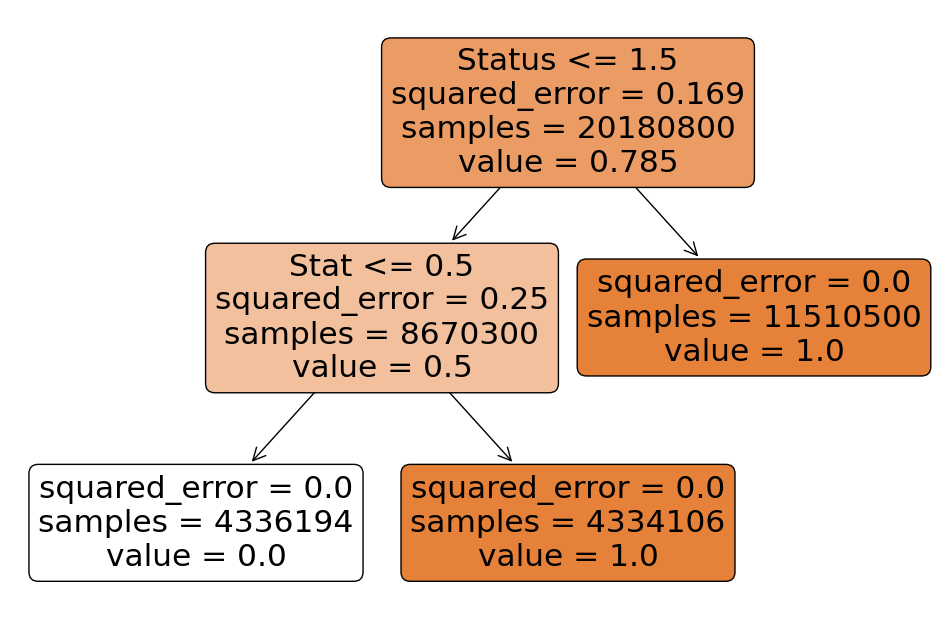

In [43]:
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor, feature_names=list(X_train.columns), filled=True, rounded=True)
plt.show()